In [75]:
# import tensorflow and keras (tf.keras not "vanilla" Keras)
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
# get data
(train_images, train_labels), (test_images,
                               test_labels) = keras.datasets.mnist.load_data()
# setup model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# train models
model.fit(train_images, train_labels, epochs=5)
# evaluate
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test accuracy:', test_acc)
# make predictions
predictions = model.predict(test_images)

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/5
18784/60000 [========>.....................] - ETA: 6s - loss: 12.6311 - acc: 0.2149

KeyboardInterrupt: 

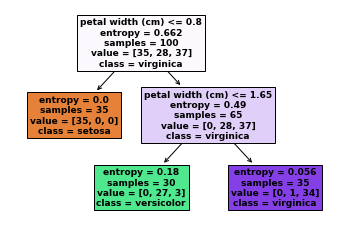

In [50]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Choose the Learning algorithm
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state=0)

#Load the dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.33, random_state=43)

#Check accuracy
cross_val_score(clf, iris.data, iris.target, cv=10)

# Fit the model
clf.fit(X_train,y_train)

# Plot tree
plot_tree(clf, feature_names = iris.feature_names, 
               class_names=iris.target_names,
               filled = True)
plt.show()

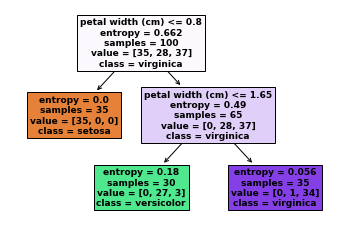

'iris_data_dec_tree.pdf'

In [51]:
import graphviz

from sklearn.tree import  export_graphviz
plot_tree(clf, filled=True, feature_names = iris.feature_names, 
               class_names=iris.target_names)
plt.show()

import graphviz 
dot_data = export_graphviz(clf, filled=True, out_file=None, feature_names = iris.feature_names, 
               class_names=iris.target_names) 
graph = graphviz.Source(dot_data) 
graph.render("iris_data_dec_tree") 

In [31]:
X_test[0,:], iris.target_names[y_test[0]]

(array([4.8, 3.1, 1.6, 0.2]), 'setosa')

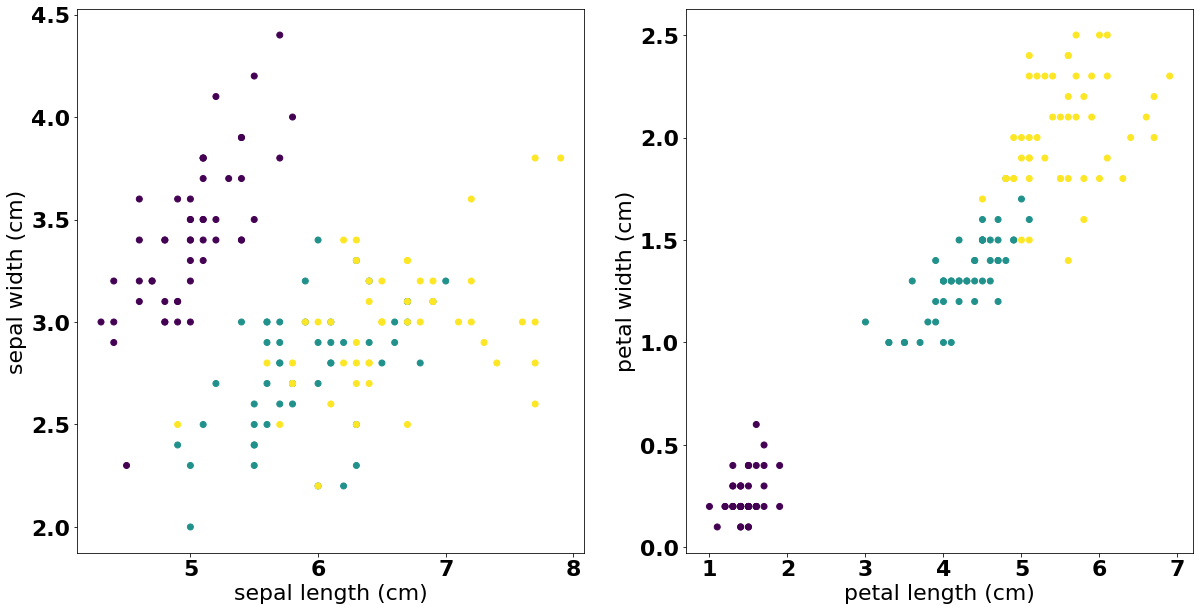

In [38]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
plt.matplotlib.rc('font', **font)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(iris.data[:,0],iris.data[:,1], c=iris.target)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.subplot(1,2,2)
plt.scatter(iris.data[:,2],iris.data[:,3], c=iris.target)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
        
plt.savefig('iris.jpg')
plt.show()


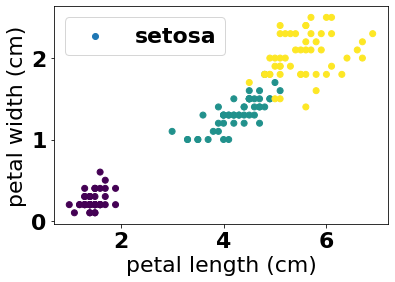

In [22]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

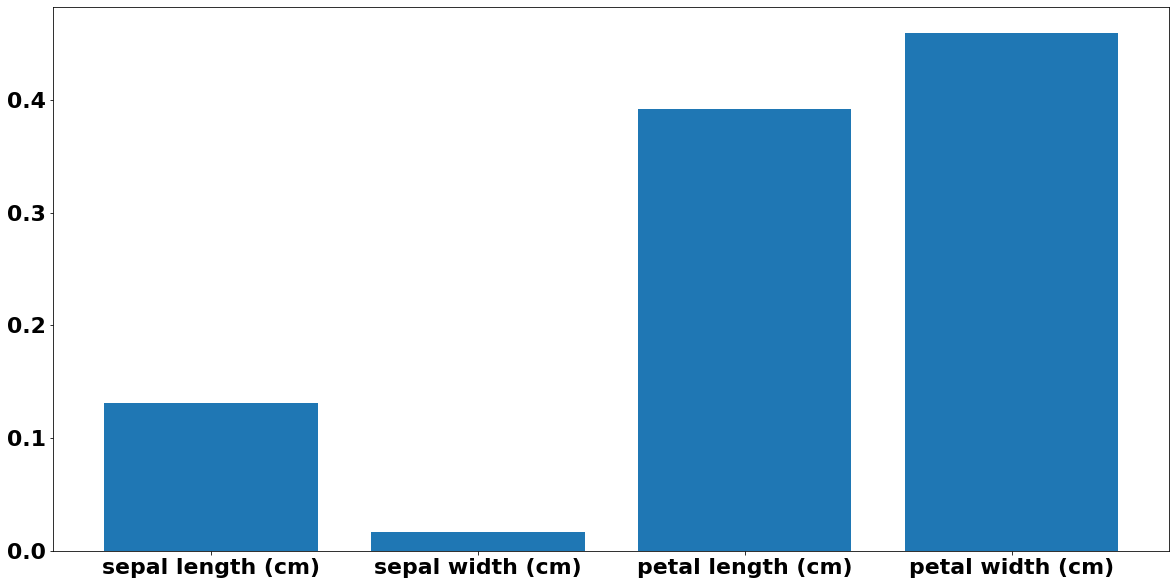

In [43]:
from sklearn.ensemble import RandomForestClassifier

plt.figure(figsize=(20,10))
clf = RandomForestClassifier(n_estimators = 100,
                            max_depth=3, bootstrap = True,
                            random_state =43)

clf.fit(X_train,y_train)
cross_val_score(clf, iris.data, iris.target, cv=10)
plt.bar(iris.feature_names, clf.feature_importances_)
plt.savefig('iris_feat_imp.jpg')
plt.show()

In [44]:
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=43, verbose=0,
                       warm_start=False)

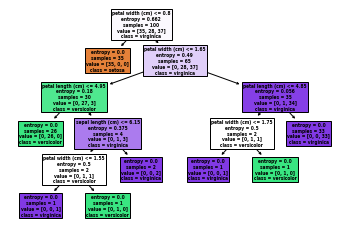

In [53]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Choose the Learning algorithm
clf = DecisionTreeClassifier(random_state=0)

#Load the dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.33, random_state=43)

#Check accuracy
cross_val_score(clf, iris.data, iris.target, cv=10)

# Fit the model
clf.fit(X_train,y_train)

# Plot tree
plot_tree(clf, feature_names = iris.feature_names, 
               class_names=iris.target_names,
               filled = True)
plt.show()

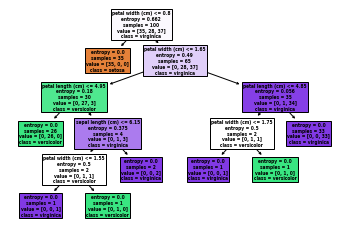

'iris_data_dec_tree_deep.pdf'

In [54]:
import graphviz

from sklearn.tree import  export_graphviz
plot_tree(clf, filled=True, feature_names = iris.feature_names, 
               class_names=iris.target_names)
plt.show()

import graphviz 
dot_data = export_graphviz(clf, filled=True, out_file=None, feature_names = iris.feature_names, 
               class_names=iris.target_names) 
graph = graphviz.Source(dot_data) 
graph.render("iris_data_dec_tree_deep") 

## Pruning and Overfitting

In [68]:
from pprint import pprint
from sklearn.model_selection import cross_val_predict, GridSearchCV
# Number of trees in the forest
max_depth = range(10)


parameters = {'max_depth':range(2,20)}
clf = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=4)
clf.fit(X=iris.data, y=iris.target)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

/Users/dieuleve/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.9666666666666667 {'max_depth': 4}


/Users/dieuleve/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


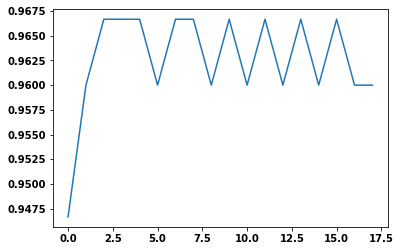

In [76]:
plt.plot(clf.cv_results_['mean_test_score'])